In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import plotly.express as px

In [3]:
# Load data
train_data = pd.read_csv("Z:/kaggle/child-mind-institute-problematic-internet-use/train.csv")
# Separate labeled and unlabeled data from train dataset
labeled_train_data = train_data.dropna(subset=['sii'])# (2736, 82)
unlabeled_train_data = train_data[train_data['sii'].isna()] # (1224, 82)
X_labeled = labeled_train_data.drop('sii', axis=1) # (2736, 81)
y_labeled = labeled_train_data['sii'] # 2736,
X_unlabeled = unlabeled_train_data.drop('sii', axis=1) # (1224, 81)

In [4]:
# Check for columns having all values missing
missing_columns = train_data.columns[train_data.isnull().all()]
print(missing_columns)

Index([], dtype='object')


In [11]:
X_labeled["PCIAT-PCIAT_17"]

0       4.0
1       0.0
2       2.0
3       4.0
5       3.0
       ... 
3953    0.0
3954    3.0
3955    2.0
3957    1.0
3958    1.0
Name: PCIAT-PCIAT_17, Length: 2736, dtype: float64

In [5]:
# separate numerical and categorical features
num_features = X_labeled.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_labeled.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing 
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

In [6]:

# Apply preprocessing to unlabeled data
X_unlabeled_processed = preprocessor.fit_transform(X_unlabeled)

c:\Users\ariaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PCIAT-PCIAT_01' 'PCIAT-PCIAT_02' 'PCIAT-PCIAT_03' 'PCIAT-PCIAT_04'
 'PCIAT-PCIAT_05' 'PCIAT-PCIAT_06' 'PCIAT-PCIAT_07' 'PCIAT-PCIAT_08'
 'PCIAT-PCIAT_09' 'PCIAT-PCIAT_10' 'PCIAT-PCIAT_11' 'PCIAT-PCIAT_12'
 'PCIAT-PCIAT_13' 'PCIAT-PCIAT_14' 'PCIAT-PCIAT_15' 'PCIAT-PCIAT_16'
 'PCIAT-PCIAT_17' 'PCIAT-PCIAT_18' 'PCIAT-PCIAT_19' 'PCIAT-PCIAT_20'
 'PCIAT-PCIAT_Total']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ariaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PCIAT-Season']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [7]:
# number of samples for each class in the labeled dataset
class_counts = y_labeled.value_counts()
print(class_counts)

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64


In [ ]:
X_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

In [10]:
# Apply preprocessing to labeled data
X_labeled_processed = preprocessor.transform(X_labeled)
# Convert sparse matrix to dense 
X_labeled_dense = X_labeled_processed.toarray()



c:\Users\ariaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PCIAT-PCIAT_01' 'PCIAT-PCIAT_02' 'PCIAT-PCIAT_03' 'PCIAT-PCIAT_04'
 'PCIAT-PCIAT_05' 'PCIAT-PCIAT_06' 'PCIAT-PCIAT_07' 'PCIAT-PCIAT_08'
 'PCIAT-PCIAT_09' 'PCIAT-PCIAT_10' 'PCIAT-PCIAT_11' 'PCIAT-PCIAT_12'
 'PCIAT-PCIAT_13' 'PCIAT-PCIAT_14' 'PCIAT-PCIAT_15' 'PCIAT-PCIAT_16'
 'PCIAT-PCIAT_17' 'PCIAT-PCIAT_18' 'PCIAT-PCIAT_19' 'PCIAT-PCIAT_20'
 'PCIAT-PCIAT_Total']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ariaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['PCIAT-Season']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [14]:
# Check the number of NaN values in each of the affected columns
print(X_labeled[['PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17']].isna().sum())

# Check rows with NaN values across all affected columns
nan_rows = X_labeled[['PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17']].isna().all(axis=1)
print("Rows with all NaNs in specified columns:", X_labeled[nan_rows])


PCIAT-PCIAT_15     6
PCIAT-PCIAT_16     8
PCIAT-PCIAT_17    11
dtype: int64
Rows with all NaNs in specified columns:           id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
93  053d7d31                    Spring               15                1   

   CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
93         NaN              NaN            Fall           NaN   

    Physical-Height  Physical-Weight  ...  PCIAT-PCIAT_17  PCIAT-PCIAT_18  \
93              NaN              NaN  ...             NaN             NaN   

    PCIAT-PCIAT_19  PCIAT-PCIAT_20 PCIAT-PCIAT_Total  SDS-Season  \
93             NaN             NaN               0.0         NaN   

    SDS-SDS_Total_Raw  SDS-SDS_Total_T PreInt_EduHx-Season  \
93                NaN              NaN              Spring   

    PreInt_EduHx-computerinternet_hoursday  
93                                     2.0  

[1 rows x 81 columns]


In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)
# Step 1: Fill numerical and categorical columns separately
X_labeled[num_features] = X_labeled[num_features].fillna(X_labeled[num_features].mean())
X_labeled[cat_features] = X_labeled[cat_features].fillna(X_labeled[cat_features].mode().iloc[0])


# Step 3: Transform the data using the preprocessor
X_labeled_processed = preprocessor.fit_transform(X_labeled)

# Now X_labeled_processed is ready for PCA
print("Processed data shape:", X_labeled_processed.shape)

Processed data shape: (2736, 2837)


In [55]:
X_labeled_processed.dtype #float64
X_labeled.dtypes #float64, object

id                                         object
Basic_Demos-Enroll_Season                  object
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-Season                                object
                                           ...   
SDS-Season                                 object
SDS-SDS_Total_Raw                         float64
SDS-SDS_Total_T                           float64
PreInt_EduHx-Season                        object
PreInt_EduHx-computerinternet_hoursday    float64
Length: 81, dtype: object

In [ ]:
X_labeled.info() #(2736, 81)

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2736 non-null   object 
 5   CGAS-CGAS_Score                         2736 non-null   float64
 6   Physical-Season                         2736 non-null   object 
 7   Physical-BMI                            2736 non-null   float64
 8   Physical-Height                         2736 non-null   float64
 9   Physical-Weight                         2736 non-null   float64
 10  Physical-Waist_Circumference            2736 non-null   float64
 

In [62]:
pca_variance = pca.explained_variance_ratio_
print("variance of the first two components:", pca_variance)

variance of the first two components: [0.17775908 0.14422324]


In [39]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_labeled_processed)

fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y_labeled)
fig.update_layout(
    title="PCA visualization",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_labeled_processed)
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y_labeled)
fig.update_layout(
    title="PCA visualization",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()


<Figure size 1500x1000 with 0 Axes>

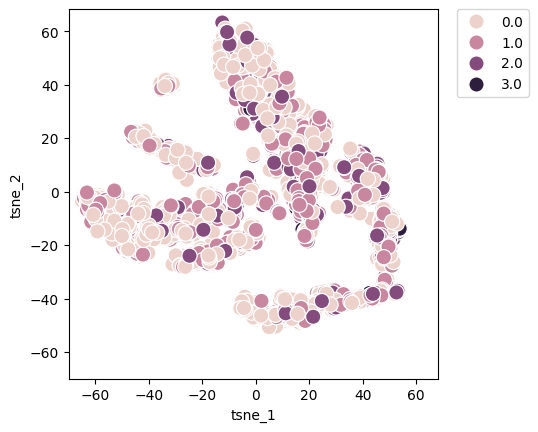

In [28]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X_labeled_dense)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
plt.figure(figsize=(15, 10))
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_labeled})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

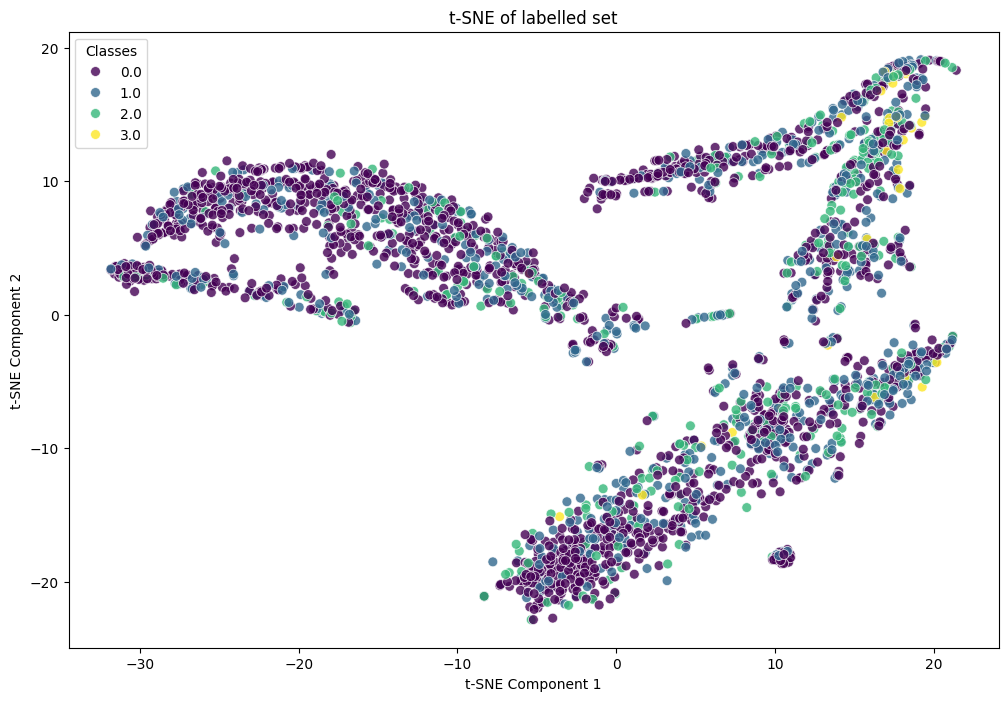

In [23]:
from sklearn.manifold import TSNE
# t-SNE to the dense matrix
tsne_labeled = TSNE(n_components=2, random_state=42, perplexity=150)
X_labeled_tsne = tsne_labeled.fit_transform(X_labeled_dense)
# Visualize t-SNE using true class labels
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_labeled_tsne[:, 0], y=X_labeled_tsne[:, 1], hue=y_labeled, palette="viridis", s=50, alpha=0.8)
plt.title("t-SNE of labelled set")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Classes")
plt.show()


######## 3D t-SNE plots ############ > fig saved > DONE

In [16]:
from sklearn.manifold import TSNE
import plotly.express as px

# 3D t-SNE 
tsne_labeled_3d = TSNE(n_components=3, random_state=42, perplexity=50)
X_labeled_tsne_3d = tsne_labeled_3d.fit_transform(X_labeled_dense)

# 3D Scatter Plot with Plotly, using y_labeled as color
fig = px.scatter_3d(
    x=X_labeled_tsne_3d[:, 0],
    y=X_labeled_tsne_3d[:, 1],
    z=X_labeled_tsne_3d[:, 2],
    color=y_labeled.astype(str),
    title="3D t-SNE projectiont of Labeled set",
    labels={'color': 'True Labels'}
)

fig.update_traces(marker=dict(size=4, opacity=0.7))
fig.write_html("3d_tsne_all_classes_labeled_set.html")
fig.show()


####### 2 by 2 3D t-SNE plots ############### results save > 

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
import numpy as np
from itertools import combinations

# 3D t-SNE on the entire dataset only once
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(X_labeled_dense)

# unique classes in y_labeled
unique_classes = np.unique(y_labeled)

# get each pair of classes 2by 2
for class_a, class_b in combinations(unique_classes, 2):
    # Filter data points for the current pair of classes
    pair_mask = np.isin(y_labeled, [class_a, class_b])
    X_pair_tsne = X_tsne_3d[pair_mask]
    labels_pair = y_labeled[pair_mask]
    
    # 3D Scatter Plot with Plotly, displaying each pair of classes
    fig = px.scatter_3d(
        x=X_pair_tsne[:, 0],
        y=X_pair_tsne[:, 1],
        z=X_pair_tsne[:, 2],
        color=labels_pair.astype(str),  # Convert labels to strings
        title=f"3D t-SNE projection for Classes {int(class_a)} and {int(class_b)}",
        labels={'color': 'Class'}
    )
    
    # Customize marker size and transparency
    fig.update_traces(marker=dict(size=4, opacity=0.7))
    
    fig.show()

    


#### 3D t-SNE for each class solely in a figure ######### > fig save >

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# 3D t-SNE on the entire dataset
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(X_labeled_dense)

# unique classes in y_labeled
unique_classes = np.unique(y_labeled)

# Get a 3D Plotly plot for each class separately
for class_label in unique_classes:
    # Filter data points for the current class
    class_mask = y_labeled == class_label
    X_class_tsne = X_tsne_3d[class_mask]
    
    # 3D t-SNE Scatter Plot with Plotly, displaying only one class each time
    fig = px.scatter_3d(
        x=X_class_tsne[:, 0],
        y=X_class_tsne[:, 1],
        z=X_class_tsne[:, 2],
        title=f"3D t-SNE projection for Class {int(class_label)}",
        labels={'color': 'True Label'}
    )
    
    # Customize marker size and transparency
    fig.update_traces(marker=dict(size=4, opacity=0.7))
    
    fig.show()


#### performing PCA before clustering ##########

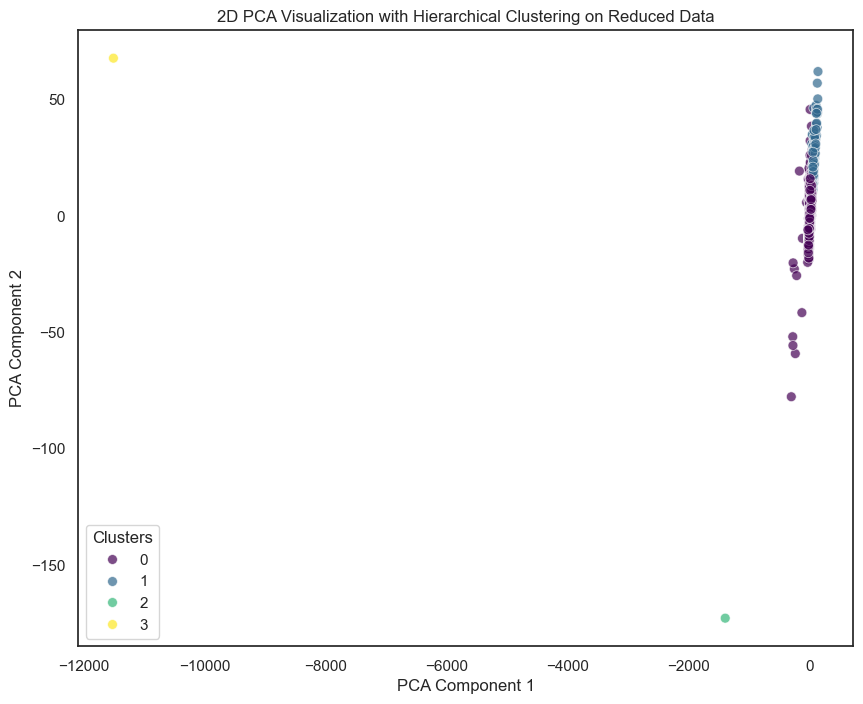

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

#PCA to reduce dimensions
pca = PCA(n_components=10, random_state=42)
X_labeled_reduced = pca.fit_transform(X_labeled_dense)

# h. clustering on the reduced data
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(X_labeled_reduced)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_labeled_reduced[:, 0], y=X_labeled_reduced[:, 1], hue=hierarchical_labels, palette="viridis", s=50, alpha=0.7)
plt.title("2D PCA Visualization with Hierarchical Clustering on Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clusters")
plt.show()




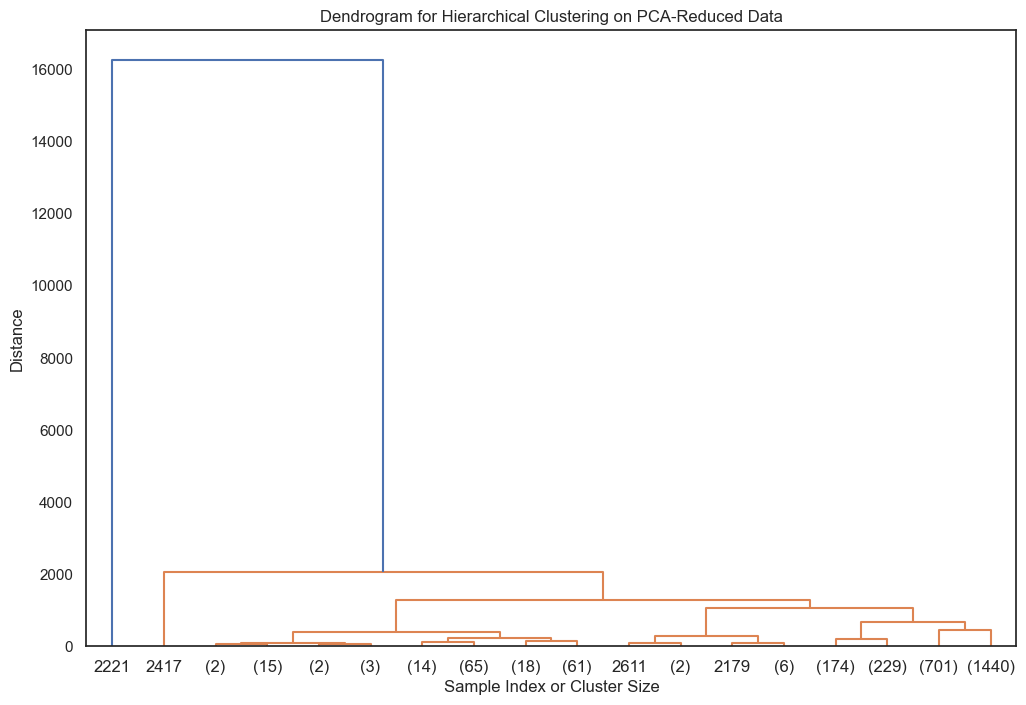

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# h. clustering and generate linkage matrix
Z = linkage(X_labeled_reduced, method='ward', metric='euclidean')

# dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5, color_threshold=0.7*max(Z[:, 2]), show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering on PCA-Reduced Data")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()


c:\Users\ariaj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



<Figure size 1000x1000 with 0 Axes>

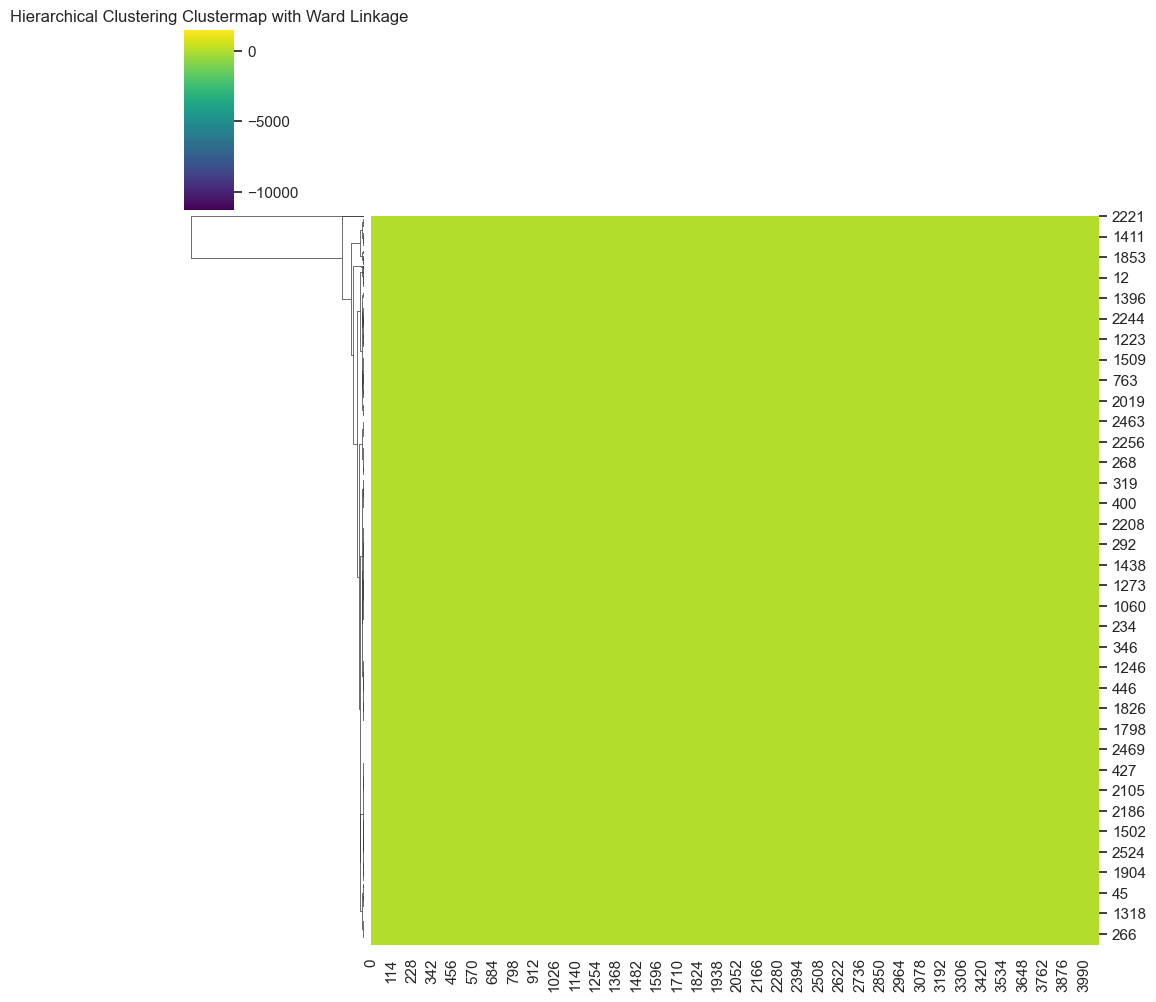

In [11]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

#  h. clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(X_labeled_dense)

sns.set(context="notebook", style="white")
plt.figure(figsize=(10, 10))

# assigned clusters from h.clustering
sns.clustermap(X_labeled_dense, method='ward', metric='euclidean', cmap="viridis", row_cluster=True, col_cluster=False)
plt.title("Hierarchical Clustering Clustermap with Ward Linkage")
plt.show()
